# Log-log plot estimator

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,quantile_test


# In order to use everything in this notebook will be need some other function that produces some data
# Here will be used `full_data_random_walk()` from 'rwre.py'
from rwre import full_data_random_walk


# taking absolute value of S_n, sorting the samples, calculate mean and median.
def treat_this_data(A):
    absA = np.abs(A)
    sortedAbs = np.sort(absA)
    meanA = absA.mean(1)
    median = np.quantile(absA,0.5,1)
    return (absA,sortedAbs,meanA, median)

# Example  of use
k1=3
k2=6
Numbsimul=10
A = full_data_random_walk(k1,k2,Numbsimul)
print('Raw data')
print(A)
print('\n')
absA, sortedAbs, meanA, median = treat_this_data(A)
print('absolute value of data')
print(absA)
print('\n')
print('sorted absolute value of data')
print(sortedAbs)
print('\n')
print('mean values of each row')
print(meanA)
print('\n')
print('median values of each row')
print(median)

4it [00:00, 55.92it/s]



--- 0.0769493579864502 seconds ---


Raw data
[[ 1. -3. -5.  1.  1. -1. -1. -3. -5. -3.]
 [-3.  5.  3. -5.  7.  3. -7. -1.  1. -7.]
 [ 5. 15.  1.  1. -3. -1.  7.  1.  5. -1.]
 [-7. 13. -1. -5.  5.  9. -5.  5. -3. -5.]]


absolute value of data
[[ 1.  3.  5.  1.  1.  1.  1.  3.  5.  3.]
 [ 3.  5.  3.  5.  7.  3.  7.  1.  1.  7.]
 [ 5. 15.  1.  1.  3.  1.  7.  1.  5.  1.]
 [ 7. 13.  1.  5.  5.  9.  5.  5.  3.  5.]]


sorted absolute value of data
[[ 1.  1.  1.  1.  1.  3.  3.  3.  5.  5.]
 [ 1.  1.  3.  3.  3.  5.  5.  7.  7.  7.]
 [ 1.  1.  1.  1.  1.  3.  5.  5.  7. 15.]
 [ 1.  3.  5.  5.  5.  5.  5.  7.  9. 13.]]


mean values of each row
[2.4 4.2 4.  5.8]


median values of each row
[2. 4. 2. 5.]


4it [00:06,  1.55s/it]



--- 6.2212865352630615 seconds ---


number of simulations = 1000
m= 4


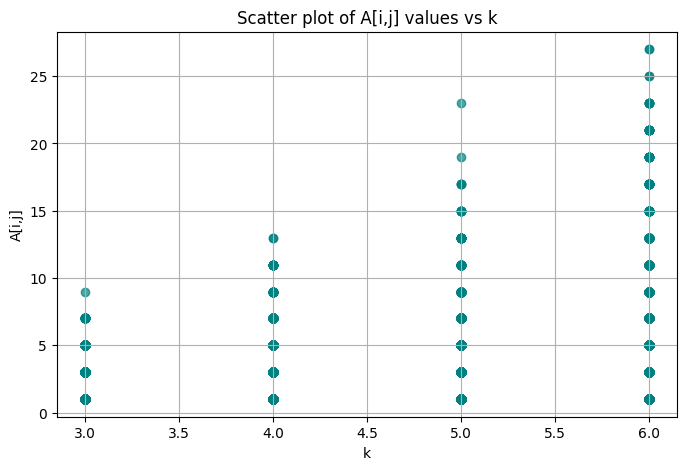

In [ ]:

k1=3
k2=6
Numbsimul=1000
A = full_data_random_walk(k1,k2,Numbsimul)
absA, sortedAbs, meanA, median = treat_this_data(A)



number of simulations = 1000
In red is the mean of each simulation size
In orange is the median of each simulation size


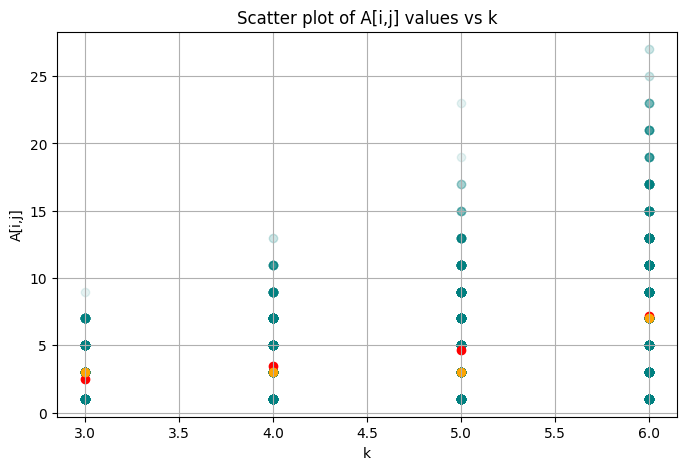

In [31]:

def expand_matrix(k1,k2,A):
    m, n = A.shape
    assert m == k2 - k1 + 1, "Matrix A's row count must be equal to k2 - k1 + 1"
    print('number of simulations =',n)
    print('In red is the mean of each simulation size')
    print('In orange is the median of each simulation size')
    result = []
    for i in range(n):
        for j in range(m):
            k = k1 + j
            result.append([A[j, i], k])
    
    return np.array(result)
# Extract for plotting
result = expand_matrix(k1,k2,sortedAbs)
values = result[:, 0]
ks = result[:, 1]

dom = range(k1,k2+1)
# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(ks, values, alpha=0.1, color='teal')
plt.scatter(dom, meanA, color='red')
plt.scatter(dom,median,color='orange')
plt.xlabel('k')
plt.ylabel('A[i,j]')
plt.title('Scatter plot of A[i,j] values vs k')
plt.grid(True)
plt.show()

The **confidence interval** is a interval $[a_1,a_2]$ for the quantile $q$, and $a_1$ is defined to be the first element with index less or equal to $q \cdot N - \Phi(\alpha)\sqrt{N}$, and $a_2$ is defined to be the first element with index less or equal to $q \cdot N + \Phi(\alpha)\sqrt{N}$.

- $N$ is the number of simulations done.
- $\alpha$ is the level of confidence.
- $\Phi$ is the inverse of the probability density function of a standard normal, i.e., 

$$\Phi(z) = \int_{-\infty}^z \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2} dx$$

In [121]:
# calculating the interval of confidence

def mult_ci(q,sortedAbs, alpha=0.01): # it gives a confifence interval centered in quantile q
    numb_columns,numb_rows = sortedAbs.shape
    # numb_columns is the range of simulations done
    # numb_rows is the number of simulations done
    ci  = np.zeros((2,numb_columns))
    for i in range(numb_columns):
        res = quantile_test(sortedAbs[i], q=q, p=q)
        ci[0][i],ci[1][i]  = res.confidence_interval(confidence_level=1-alpha)
    return ci

The following function performs a linear regression of `dom` by `out`

In [90]:
def linear_regression(dom,out,fig,ax,pos_x=0,pos_y=0,q=None,errorbar=None):
    poly_coef = np.polyfit(dom, out, 1)
    poly_out = [poly_coef[1] + poly_coef[0]*x for x in dom]
    # print the results in a graphic
    if q is not None and errorbar is not None: # when quantile and errorbar are given it's possibleto calulate an errorbar
        ax[pos_x,pos_y].plot(dom, poly_out,label='y={:.3}x+{:.2}, quantile{:.2}'.format(poly_coef[0],poly_coef[1],q))
        ax[pos_x,pos_y].legend()
        ax[pos_x,pos_y].errorbar(dom,out,yerr=errorbar, label = 'quantile {:.2}'.format(q),capsize=4, marker = 'o',)
        ax[pos_x,pos_y].legend()
    else:
        ax[pos_x,pos_y].plot(dom, poly_out,label='y={:.3}x+{:.2}, mean'.format(poly_coef[0],poly_coef[1]),)
        ax[pos_x,pos_y].plot(dom,out,label='mean samples',marker = 'o',)
        ax[pos_x,pos_y].legend(fontsize=12)
    return poly_coef # returning the values of linear coeficcients


In [122]:

def log_log_plot(q,dom, A, alpha=0.01):
    absA, sortedAbs, meanA, median = treat_this_data(A)

    logAbs    = np.log(absA)/np.log(2)
    logquantile = np.quantile(logAbs, q, 1)
    logmean   = np.log(meanA)/np.log(2)
    logmedian = np.log(median)/np.log(2)

    logerrorbar = np.log(mult_ci(q,sortedAbs,alpha))/np.log(2)
    logerrorbar_median = np.log(mult_ci(0.5, sortedAbs,alpha))/np.log(2)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    quantile_coef = linear_regression(dom,logquantile,fig,ax,0,0,q,logerrorbar)
    median_coef = linear_regression(dom,logmedian,fig,ax,0,1,0.5,logerrorbar_median)
    mean_coef = linear_regression(dom,logmean,fig,ax,1,0)

    plt.tight_layout()
    plt.show()  

    print(" ---- diffusion constant is approximally %s using quantile %s ----" % (quantile_coef[0],q))
    print(" ---- diffusion constant is approximally %s median ----" % (median_coef[0]))
    print(" ---- diffusion constant is approximally %s mean ----" % (mean_coef[0]))
    


5it [02:35, 31.09s/it]




--- 155.4303903579712 seconds ---




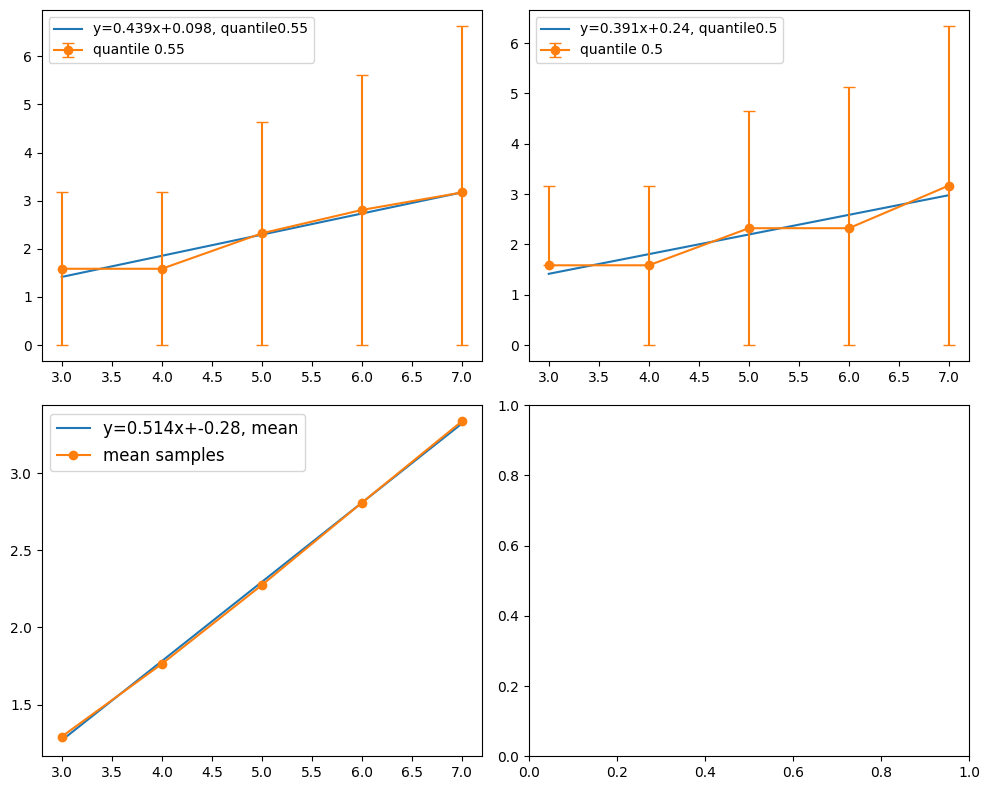

 ---- diffusion constant is approximally 0.43923174227787615 using quantile 0.55 ----
 ---- diffusion constant is approximally 0.390689059560852 median ----
 ---- diffusion constant is approximally 0.5142329994334494 mean ----


In [127]:

# Example of use
k1 = 3
k2 = 7
Numbsimul = 10000
A = full_data_random_walk(k1,k2, Numbsimul)

q = 0.55
dom = np.arange(k1,k2+1)
log_log_plot(q,dom,A)